# Time series Forecasting for predicting COVID - 19 cases

Time series forecasting involves predicting future values based on historical data points that are ordered chronologically. It is an essential analytical technique with a wide range of applications across various fields.  
In epidemiology, forecasting helps researchers understand disease dynamics, transmission patterns, and the effectiveness of interventions. For COVID-19, accurate predictions contribute to a deeper understanding of the virus's behavior and impact.

### Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action = 'ignore')

### Downloading the dataset using pandas

In [3]:
df1 = pd.read_csv('CONVENIENT_global_confirmed_cases.csv') 
df2 = pd.read_csv('CONVENIENT_global_deaths.csv')

- df1 is a dataframe with confirmed cases across the globe
- df2 is a dataframe with deaths across the globe

In [65]:
df1.haed()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1133,2/28/23,14.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,181.0,0.0
1134,3/1/23,18.0,17.0,7.0,9.0,22.0,0.0,0.0,0.0,0.0,...,0.0,139.0,0.0,5.0,9.0,0.0,0.0,0.0,0.0,206.0
1135,3/2/23,18.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,67.0,0.0
1136,3/3/23,4.0,19.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,28.0,13.0,0.0,0.0,0.0,0.0,0.0
1137,3/4/23,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.0,12.0,0.0,0.0,0.0,0.0,0.0
1138,3/5/23,21.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,56.0,0.0
1139,3/6/23,16.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,...,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,30.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,20.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,15.0,16.0,4.0,15.0,11.0,0.0,0.0,0.0,489.0,...,0.0,176.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,149.0
1142,3/9/23,0.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df2.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1133,2/28/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1134,3/1/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1135,3/2/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1136,3/3/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1137,3/4/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1138,3/5/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,3/6/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1142,3/9/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Engineering:

- The two dataframes - df1 and df2 doesn't give the total cases in a particular country, instead it just gives number of cases per day
- Let us create a dataframe which gives the total number of cases in each country.

In [53]:
# Let us create an empty dataframe called 'world' with the name of the columns as country and cases.

world = pd.DataFrame({'Country': [], 'Cases': []}) 


In [55]:
# Allocating the country names which are represented as columns in df1 dataframe as entries to Country column in the world dataframe

world['Country'] = df1.iloc[:,1:].columns

In [56]:
world['Country']

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country, Length: 289, dtype: object

In [67]:
# Creating an empty list called cases

cases = []

In [68]:
# summing up all the cases in each country and appending it to a list called cases.

for i in world["Country"]:
    cases.append(pd.to_numeric(df1[i][1:]).sum())
world["Cases"]=cases

In [69]:
world['Cases'] # This column gives the number of cases in the country

0      209451.0
1      334457.0
2      271496.0
3       47890.0
4      105288.0
         ...   
284    703228.0
285       535.0
286     11945.0
287    343135.0
288    264276.0
Name: Cases, Length: 289, dtype: float64

In [70]:
df1['Afghanistan'][1:] # gives all the cases in Afghanistan

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
1138    21.0
1139    16.0
1140    30.0
1141    15.0
1142     0.0
Name: Afghanistan, Length: 1142, dtype: float64

In [71]:
world.head()

,Country,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0


In [72]:
world.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  289 non-null    object 
 1   Cases    289 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [73]:
country_names = world['Country'].tolist()

In [74]:
world.head()

,Country,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0


In [75]:
world['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Australia.1', 'Australia.2', 'Australia.3',
       'Australia.4', 'Australia.5', 'Australia.6', 'Australia.7',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Canada.1',
       'Canada.2', 'Canada.3', 'Canada.4', 'Canada.5', 'Canada.6',
       'Canada.7', 'Canada.8', 'Canada.9', 'Canada.10', 'Canada.11',
       'Canada.12', 'Canada.13', 'Canada.14', 'Canada.15',
       'Central African Republic', 'Chad', 'Chile', 'China', 'China.1',
       'China.2', 'China.3', 'China.4', 'China.5', 'China.6', 'China.7',
       'China.8', 'China.9', 'China.10', 'China.11', 'China

From the above output, we can conclude that the country names are not unique. For eg - There are 34 different entries for China. The country names are written as China.1, China.2, China.3 etc. We can sum up all the cases of China into a single entry by removing the '.' from the country column.

In [76]:

country_names = []
for i in world['Country']:
    names = (i.split('.')[0])
    country_names.append(names)   

In [77]:
country_names

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'Ch

There are country names like Congo (Brazzaville), Congo (Kinshasa). The number of cases in this country can be summed up by ignoring the neames inside the brackets (). 

In [78]:
final_country_list = []
for i in country_names:
    names = (i.split('(')[0])
    final_country_list.append(names)
    

In [80]:
from collections import Counter

Counter(final_country_list)

Counter({'Afghanistan': 1,
         'Albania': 1,
         'Algeria': 1,
         'Andorra': 1,
         'Angola': 1,
         'Antarctica': 1,
         'Antigua and Barbuda': 1,
         'Argentina': 1,
         'Armenia': 1,
         'Australia': 8,
         'Austria': 1,
         'Azerbaijan': 1,
         'Bahamas': 1,
         'Bahrain': 1,
         'Bangladesh': 1,
         'Barbados': 1,
         'Belarus': 1,
         'Belgium': 1,
         'Belize': 1,
         'Benin': 1,
         'Bhutan': 1,
         'Bolivia': 1,
         'Bosnia and Herzegovina': 1,
         'Botswana': 1,
         'Brazil': 1,
         'Brunei': 1,
         'Bulgaria': 1,
         'Burkina Faso': 1,
         'Burma': 1,
         'Burundi': 1,
         'Cabo Verde': 1,
         'Cambodia': 1,
         'Cameroon': 1,
         'Canada': 16,
         'Central African Republic': 1,
         'Chad': 1,
         'Chile': 1,
         'China': 34,
         'Colombia': 1,
         'Comoros': 1,
         'Congo ': 2

In [81]:
len(final_country_list)

289

In [82]:
world['Country'] = final_country_list # Replacing the country names in the world dataframe after removing '.' and '()'

In [83]:
world = world.groupby("Country")["Cases"].sum().reset_index() # To group the data based on Country names.
world.head()

,Country,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0


In [84]:
continent = pd.read_csv("continents2.csv")
continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [85]:
world.head()

,Country,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0


In [87]:
continent['name'] = continent['name'].str.upper()  

# Data Visualization:

### Worldwide spread of COVID-19

To visualize world wide spread of Covid-19 cases, it is necessary to group the data based on cases range. pd.cut() is a Pandas function used to bin continuous numerical data into discrete categories (bins). 

In [88]:
world['Cases Range'] = pd.cut(world['Cases'], [-150000, 50000, 200000, 800000, 1500000, 15000000], labels = ["Upto 50K", '50K to 200K', '200K to 800K', '800K to 1.5M','15M+' ])

In [89]:
world.head()

,Country,Cases,Cases Range
0,Afghanistan,209451.0,200K to 800K
1,Albania,334457.0,200K to 800K
2,Algeria,271496.0,200K to 800K
3,Andorra,47890.0,Upto 50K
4,Angola,105288.0,50K to 200K


To visualize geographically using Ploty.express, the locations typically require abbreviated country names or specific codes that are recognized by plotly. Therefore, we can use the "Alpha3" column of Continent dataframe as the locations parameter for the choropleth map. 

Before mapping, we need to check if the country names in the two dataframes, 'world' and 'continent' matches. 

In [90]:
alpha = []
for i in world["Country"].str.upper().values:
    if i == "BRUNEI":
        i="BRUNEI DARUSSALAM"
    elif  i=="US":
        i="UNITED STATES" 
    if len(continent[continent["name"]==i]["alpha-3"].values)==0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Alpha3"]=alpha

In [91]:
world.head()

,Country,Cases,Cases Range,Alpha3
0,Afghanistan,209451.0,200K to 800K,AFG
1,Albania,334457.0,200K to 800K,ALB
2,Algeria,271496.0,200K to 800K,DZA
3,Andorra,47890.0,Upto 50K,AND
4,Angola,105288.0,50K to 200K,AGO


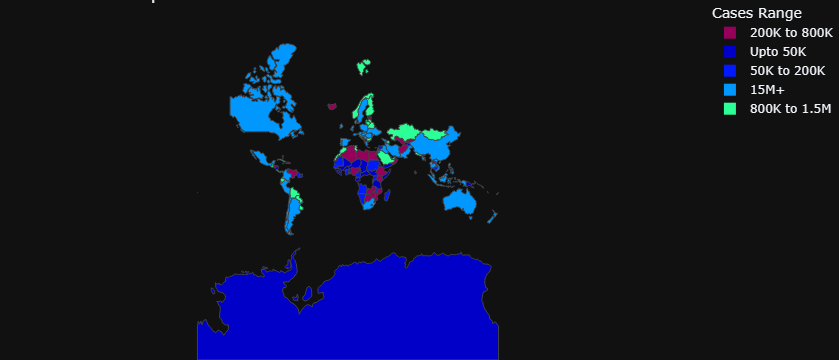

In [94]:
fig = px.choropleth(world.dropna(),
                   locations="Alpha3",
                   color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence = px.colors.sequential.Rainbow,
                    template = 'plotly_dark',
                    title = 'World wide spread of COVID-19')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Visualizing daily cases across the globe

For visualizing daily cases and daily deaths around the world, we need to create a new dataframe which has number of cases and number of deaths recorded per day.

In [96]:
plt.style.use('seaborn')
cases_count = []
for i in range(1, len(df1)):
    cases_count.append(sum(pd.to_numeric(df1.iloc[i, 1:].values)))
    
df = pd.DataFrame()  # creating a new dataframe
df['Date'] = df1['Country/Region'][1:]  
df['Cases'] = cases_count
df = df.set_index('Date')
    
death_count = []
for i in range(1, len(df2)):
    death_count.append(sum(pd.to_numeric(df2.iloc[i,1:].values)))
    
df['Deaths'] = death_count   

In [97]:
df  

,Cases,Deaths
Date,,
1/23/20,100.0,1.0
1/24/20,287.0,8.0
1/25/20,493.0,16.0
1/26/20,683.0,14.0
1/27/20,809.0,26.0
...,...,...
3/5/23,56126.0,148.0
3/6/23,58040.0,366.0
3/7/23,130437.0,923.0


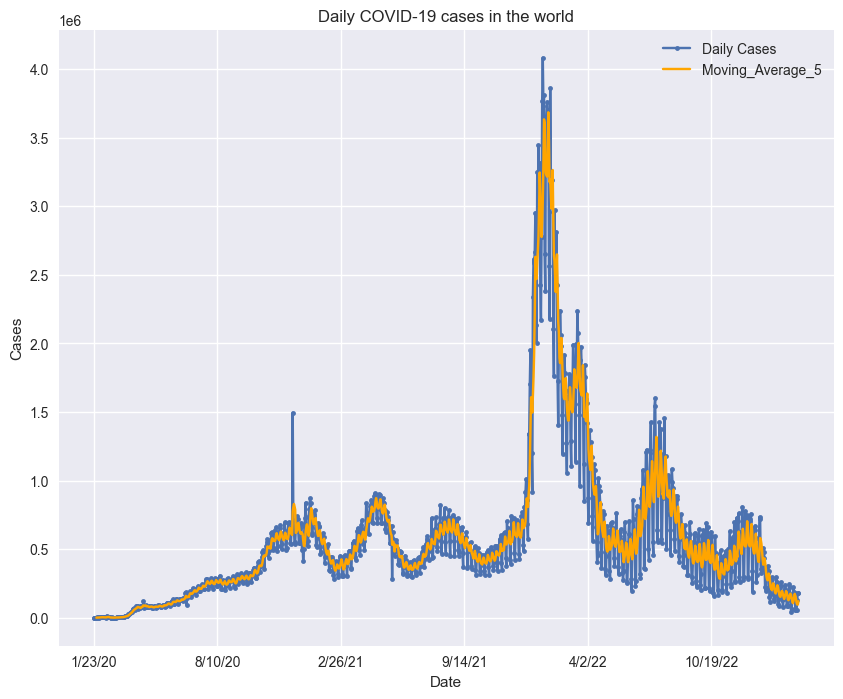

In [98]:
df['Cases'].plot(title = 'Daily COVID-19 cases in the world', marker = '.', figsize = (10,8),label = 'Daily Cases')
df['Cases'].rolling(window = 5).mean().plot(figsize = (10,8), label = 'Moving_Average_5', color = 'orange')
plt.ylabel('Cases')
plt.legend()
plt.show()

The moving average is a commonly used statistical technique that helps to reduce noise and fluctuations in data by calculating the average of a subset of data points within a specified window or interval. The moving average smooths out the fluctuations in the daily data by calculating the average of the cases over a rolling window of 5 days.

### Visualizing daily deaths across the globe

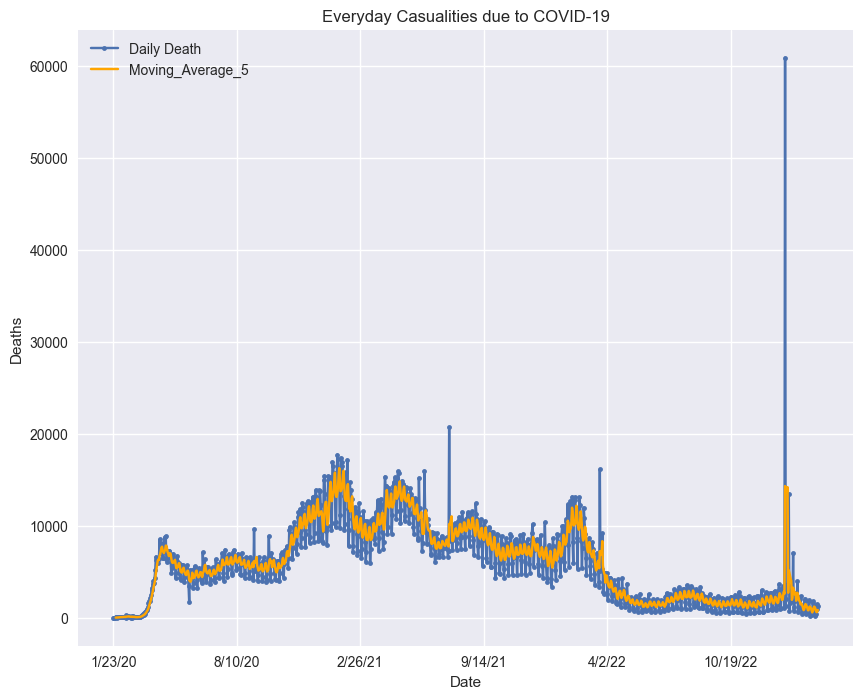

In [99]:
df['Deaths'].plot(title = 'Everyday Casualities due to COVID-19', marker = '.', figsize = (10,8), label = 'Daily Death')
df['Deaths'].rolling(window = 5).mean().plot(figsize = (10,8), label = 'Moving_Average_5', color = 'orange')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [102]:
df_prophet  = pd.DataFrame({"ds":[],"y":[]})
df_prophet["ds"] = pd.to_datetime(df.index)
df_prophet["y"]  = df.iloc[:,0].values

In [103]:
df_prophet

,ds,y
0,2020-01-23,100.0
1,2020-01-24,287.0
2,2020-01-25,493.0
3,2020-01-26,683.0
4,2020-01-27,809.0
...,...,...
1137,2023-03-05,56126.0
1138,2023-03-06,58040.0
1139,2023-03-07,130437.0
1140,2023-03-08,179446.0


The last date of recorded cases is 2023-03-09. We can predict what will be the trend of Covid-19 cases in future. Here the pattern of Covid-19 cases is forecasted for the next 30 days using Prophet model which used Time Series Forecasting. 

19:54:29 - cmdstanpy - INFO - Chain [1] start processing
19:54:29 - cmdstanpy - INFO - Chain [1] done processing


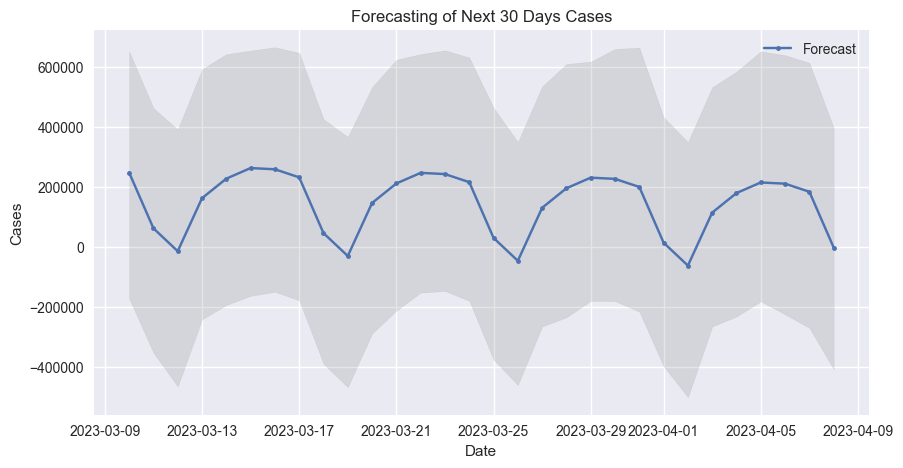

In [109]:
model = Prophet(weekly_seasonality= True, daily_seasonality= False, yearly_seasonality=False)
model.fit(df_prophet)
future = model.make_future_dataframe(periods=30, include_history=False)
forecast = model.predict(future)


plt.figure(figsize=(10, 5))
plt.plot(forecast['ds'], forecast['yhat'], marker=".", label="Forecast")
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color="gray", alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Forecasting of Next 30 Days Cases')
plt.legend()
plt.show()